# Analyzing Video Games Sales

Our client online store Ice sells video games all over the world. We will identify patterns that determine whether a game succeeds or not in order to spot potential big winners and plan advertising campaigns. Our data contains user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales all of which are available from open sources.

We'll determine which segment of our data will be used for our 2017 prognosis. We'll analyze leading platforms, the effect reviews have on sales, and which genres are most popular. Our data will also suggest the typical customer by region.

Additionally, we'll form two experiments that will suggest to us the following:  
- Are average user ratings of the Xbox One and PC platforms the same
- Are average user ratings of the Xbox One and PC platforms are the same

# Table of Contents
[1 Open the data file and have a look at the general information](#1heading)  
&emsp;[1.1 Conclusion](#1.1heading)  
[2 Data preprocessing](#2heading)  
&emsp;[2.1 Processing missing values](#2.1heading)  
&emsp;[2.2 Data type replacement](#2.2heading)  
&emsp;[2.3 Processing duplicates](#2.3heading)  
&emsp;[2.4 Adding total sales](#2.4heading)  
[3 Analyzing the data](#3heading)  
&emsp;[3.1 How many games were released over the years](#3.1heading)   
&emsp;[3.2 Sales varying from platform to platform over the years](#3.2heading)  
&emsp;[3.3 Data for 2017 prognosis](#3.3heading)  
&emsp;[3.4 Platforms leading in sales (2014 - 2016)](#3.4heading)  
&emsp;[3.5 Global sales of all games, broken down by platform (2014 - 2016)](#3.5heading)  
&emsp;[3.6 Do user and professional reviews affect sales for one popular platform? (2014 - 2016)](#3.6heading)  
&emsp;[3.7 Comparing the sales of the same game on other platforms (2014 - 2016)](#3.7heading)  
&emsp;[3.8 Profitability of games based on genre (2014 - 2016)](#3.8heading)  
[4 Creating a user profile for each region](#4heading)  
&emsp;[4.1 Top Five Platforms by Region](#4.1heading)  
&emsp;[4.2 Top Five Genres by Region](#4.2heading)  
&emsp;[4.3 ESRB Ratings and Sales by Region](#4.3heading)  
[5 Testing Hypothesis](#5heading)  
&emsp;[5.1 Average user ratings of the Xbox One and PC platforms are the same](#5.1heading)  
&emsp;[5.2 Average user ratings for the Action and Sports genres are the same](#5.2heading)  
[6 General Conclusion](#6heading)

<a id='1heading'></a>

## Open the data files and have a look at the general information

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from math import factorial
from scipy import stats as st
from functools import reduce

In [2]:
#Read file
games_data = pd.read_csv('/Users/AntonioKuri/Desktop/Training/Practicum/Projects/Project 4/games.csv')

In [3]:
#Check file's first five rows and the data info
print(games_data.head())
print(games_data.info())
print(games_data.describe())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

<a id='1.1heading'></a>

### Conclusion

Dataframe has a total of 16715 rows.

Columns are Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score	and Rating.

Nulls are present in Name, Year_of_Release, Genre, Critic_Score, User_Score and Rating.

All sales columns have the 1st quartie equal to 0 in sales. Will explore this subject further in preprocessing stage.

Note: Some data types are not appropriate for the columns - will change in preprocessing stage.

<a id='2heading'></a>

## Data preprocessing

<a id='2.1heading'></a>

### Processing missing values

In [4]:
#count of nulls
print('Total Rows:', len(games_data))
games_data.isnull().sum()

Total Rows: 16715


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
#proportion of missing values
proportion_missing = games_data.isnull().sum()/len(games_data)
proportion_missing

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [6]:
games_data.isna().mean().reset_index()

,index,0
0,Name,0.000120
1,Platform,0.000000
2,Year_of_Release,0.016093
3,Genre,0.000120
4,NA_sales,0.000000
5,EU_sales,0.000000
6,JP_sales,0.000000
7,Other_sales,0.000000
8,Critic_Score,0.513192
9,User_Score,0.400897


In [7]:
#Show rows where Name is null
games_data[games_data['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Name and Genre have two nulls in the same rows. Will delete those both rows as there is no way of knowing which games they are.

In [8]:
#Delete Name and Genre nulls (only 0.01% of the data) and confirm deletion
games_data.dropna(subset = ['Name'], inplace=True)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
#Delete games without Year_of_Release - only 1% of data. Should not affect findings significantly
games_data.dropna(subset = ['Year_of_Release'], inplace=True)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16444 non-null  object 
 1   Platform         16444 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   Other_sales      16444 non-null  float64
 8   Critic_Score     7983 non-null   float64
 9   User_Score       9839 non-null   object 
 10  Rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
games_data['Year_of_Release'].isnull().sum()

0

In [11]:
#Check rows missing Critic_Score - interesting finding!
games_data[games_data['Critic_Score'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Even though Critic_Score, User_Score and Rating don't have the exact same amount of nulls, there seems to be a relationship in which a lot of games have the three categories missing.

A possible explanation for this is that Critic_Score can be missing because the game was not interesting to the user, so they left no score. Same would apply to User_Score. Quite often both user and critic score are missing in the same rows which might suggest that this data was not added to the dataset by some mistake (we can not know for sure).

Rating column is based on the content of the game itself. From ESRB website: ESRB ratings provide information about what’s in a game or app so parents and consumers can make informed choices about which games are right for their family. We can't any other columns to fill in rating.

We will not be manipulating these nulls. Instead, we will just select rows with not NaNs when doing analysis for scores.

In [12]:
#Count User_Score nulls
games_data['User_Score'].isnull().sum()

6605

In [13]:
#Replace User_Score 'TBD' with null: TBD values tell us nothing for our analysis, just like nulls
games_data['User_Score'].loc[games_data['User_Score'] == 'tbd'] = np.nan

/Users/AntonioKuri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
#Confirm creation of more User_Score nulls
games_data['User_Score'].isnull().sum()

8981

In [15]:
#Replace Rating nulls with 'unkown'
games_data['Rating'].fillna(value='unkown', inplace=True)
games_data.head(2)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unkown


In [16]:
#Explore data that has value 0 in sales
print('Propotion of NA_sales equaling 0:', len(games_data.query('NA_sales == 0'))/len(games_data))
print('Propotion of EU_sales equaling 0:', len(games_data.query('EU_sales == 0'))/len(games_data))
print('Propotion of JP_sales equaling 0:', len(games_data.query('JP_sales == 0'))/len(games_data))

Propotion of NA_sales equaling 0: 0.2705546095840428
Propotion of EU_sales equaling 0: 0.350644612016541
Propotion of JP_sales equaling 0: 0.6263682802237899


An explanation for having sales by region equal to 0 is that those games were not released in those regions.

<a id='2.2heading'></a>

### Data type replacement

In [17]:
games_data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [18]:
games_data['Year_of_Release'].isnull().sum()

0

In [19]:
#Replaceing data types
games_data['Year_of_Release'] = games_data['Year_of_Release'].astype(int)
games_data['User_Score'] = games_data['User_Score'].astype(float)

In [20]:
games_data.dtypes

Name                object
Platform            object
Year_of_Release      int64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score         float64
Rating              object
dtype: object

Year_of_Release and has been changed to int data types because their values represent whole numbers. Sales columns with numerical values have been left as floats because they contain decimal values. Critic_score column was left as float due to presence of nulls.

In [21]:
#Adding a zero to User_Score to match Critic_score format
games_data['User_Score'] *= 10
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unkown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unkown


<a id='2.3heading'></a>

### Processing duplicates

In [22]:
#Making lower case Name, Platform and Genre
games_data['Name'] = games_data['Name'].str.lower()
games_data['Platform'] = games_data['Platform'].str.lower()
games_data['Genre'] = games_data['Genre'].str.lower()

In [23]:
#Get duplicates based on based on 3 columns for games_data
duplicates = games_data[games_data.duplicated(subset=['Name', 'Platform', 'Year_of_Release'])]
duplicates

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16230,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83.0,55.0,E


In [24]:
#Looking at duplicate rows
print(games_data.query('Name == "madden nfl 13" and Platform == "ps3" and Year_of_Release == "2012"'))

                Name Platform  Year_of_Release   Genre  NA_sales  EU_sales  \
604    madden nfl 13      ps3             2012  sports      2.11      0.22   
16230  madden nfl 13      ps3             2012  sports      0.00      0.01   

       JP_sales  Other_sales  Critic_Score  User_Score Rating  
604         0.0         0.23          83.0        55.0      E  
16230       0.0         0.00          83.0        55.0      E  


The fact that we have two entries for the same game may be the result of data collection from different vendors.

In [25]:
#Will add EU sales from index 16230 to index 604, and then delete index 16230
games_data['EU_sales'][604] = games_data['EU_sales'][604] + 0.01
games_data = games_data.drop(16230)

<ipython-input-25-fd8032f19cbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_data['EU_sales'][604] = games_data['EU_sales'][604] + 0.01


In [26]:
#Confirm addition to index 604 EU_sales and deletion of index 16230
print(games_data.query('Name == "madden nfl 13" and Platform == "ps3" and Year_of_Release == "2012"'))

              Name Platform  Year_of_Release   Genre  NA_sales  EU_sales  \
604  madden nfl 13      ps3             2012  sports      2.11      0.23   

     JP_sales  Other_sales  Critic_Score  User_Score Rating  
604       0.0         0.23          83.0        55.0      E  


<a id='2.4heading'></a>

### Adding total sales

In [27]:
games_data['Total_sales'] = games_data['NA_sales']+games_data['EU_sales']+games_data['JP_sales']
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,80.0,E,74.09
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unkown,39.47
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,83.0,E,32.23
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,80.0,E,29.82
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unkown,30.38


<a id='3heading'></a>

## Analyzing the data

<a id='3.1heading'></a>

### How many games were released over the years

In [28]:
games_year_pivot = games_data.pivot_table(index='Year_of_Release', values='Name', aggfunc='count')
games_year_pivot.head()

,Name
Year_of_Release,
1980,9
1981,46
1982,36
1983,17
1984,14


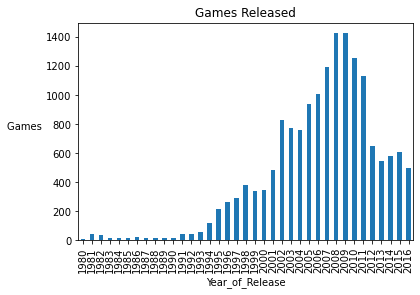

In [29]:
#Making bar chart for games released per year
games_year_pivot['Name'].plot(kind='bar')
plt.title('Games Released')
plt.ylabel('Games           ', rotation=0)
plt.show()

Before 1995, the number of games released was not that significant. We see an a parabolic trend starting from 1995 which peaked in 2008 and 2009. The financial crisis of 2008 could be a indicator that funding in the videogame industry declinde, thus resulting in less games being released in future years. Game releases have been steadily maintained at about less than half of the 2008/2009 peak.

<a id='3.2heading'></a>

### Sales varying from platform to platform over the years

In [30]:
#Making pivot table containing Total_sales per year for every platform
games_platform_sales_pivot = games_data.pivot_table(index=['Year_of_Release', 'Platform'],
                                                    values='Total_sales',
                                                    aggfunc='sum')
print(games_platform_sales_pivot.head())
print('-------------------------------------')
print(games_platform_sales_pivot.describe())

                          Total_sales
Year_of_Release Platform             
1980            2600            11.26
1981            2600            35.36
1982            2600            28.57
1983            2600             5.78
                nes             10.88
-------------------------------------
       Total_sales
count   238.000000
mean     33.746807
std      43.536787
min       0.020000
25%       3.550000
50%      14.810000
75%      47.312500
max     189.430000


In [31]:
#Selecting platforms with greatest total sales - 4th quartile
games_platform_sales_pivot = games_platform_sales_pivot.query('Total_sales >= 47.3')
print('New count of 4th quartile:', len(games_platform_sales_pivot))

New count of 4th quartile: 60


In [32]:
#See platforms with biggest sales
games_platform_sales_pivot.head()

,,Total_sales
Year_of_Release,Platform,
1984,nes,49.38
1985,nes,52.53
1989,gb,63.57
1996,ps,89.16
1997,ps,128.30


In [33]:
#Making dataframe into series
games_platform_sales_pivot = games_platform_sales_pivot.reset_index()
games_platform_sales_pivot = games_platform_sales_pivot.set_index(['Year_of_Release', 'Platform']).Total_sales

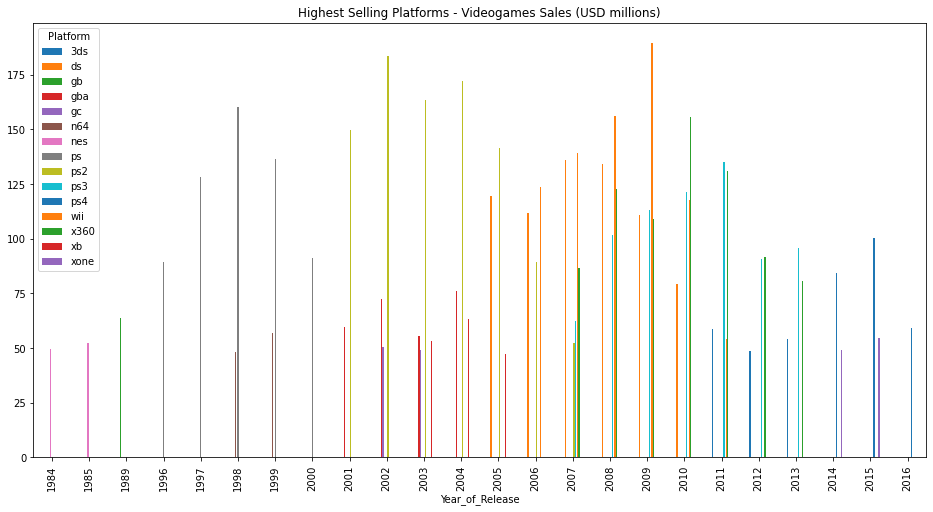

In [34]:
#Making bar chart of High Selling Platforms Sales
games_platform_sales_pivot.unstack().plot(kind='bar', figsize = (16,8))
plt.title('Highest Selling Platforms - Videogames Sales (USD millions)')
plt.show()

We can see from the bar chart above that gaming platforms have a parabolic lifetime. It takes about 5-6 years for new platforms to appear and old ones to fade.



<a id='3.3heading'></a>

### Data for 2017 prognosis

Total games released has remained consitent since 2014 and there is no reason to believe that 2017 will be any different.

2014 marks the inception of next generation consoles PS4 and XOne.

PS3 and Xbox360 have reached the end of their lifetime for high sales. The data indicates that the PS4 and Xbox1 consoles that will have the most sales for 2017 because their product lifetime has only started in 2014.

After taking these points into consideration, we'll take be working with data from 2014 and later.

In [35]:
#Slice the data for years 2014 and later; confirming query
games_data_now = games_data.query('Year_of_Release >= 2014')
games_data_now['Year_of_Release'].value_counts()

2015    606
2014    581
2016    502
Name: Year_of_Release, dtype: int64

In [36]:
games_data_now.head(1)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unkown,12.25


<a id='3.4heading'></a>

### Platforms leading in sales (2014 - 2016)

In [37]:
#Making pivot table containing Total_sales per year for every platform (2014 and later)
games_platform_sales_pivot_now = games_data_now.pivot_table(index=['Year_of_Release', 'Platform'], values='Total_sales', aggfunc='sum')
games_platform_sales_pivot_now.head()

Total_sales
Year_of_Release Platform             
2014            3ds             41.75
                pc              12.38
                ps3             40.88
                ps4             84.22
                psp              0.24

In [38]:
#Making dataframe into series
games_platform_sales_pivot_now = games_platform_sales_pivot_now.reset_index()
games_platform_sales_pivot_now = games_platform_sales_pivot_now.set_index(['Year_of_Release', 'Platform']).Total_sales

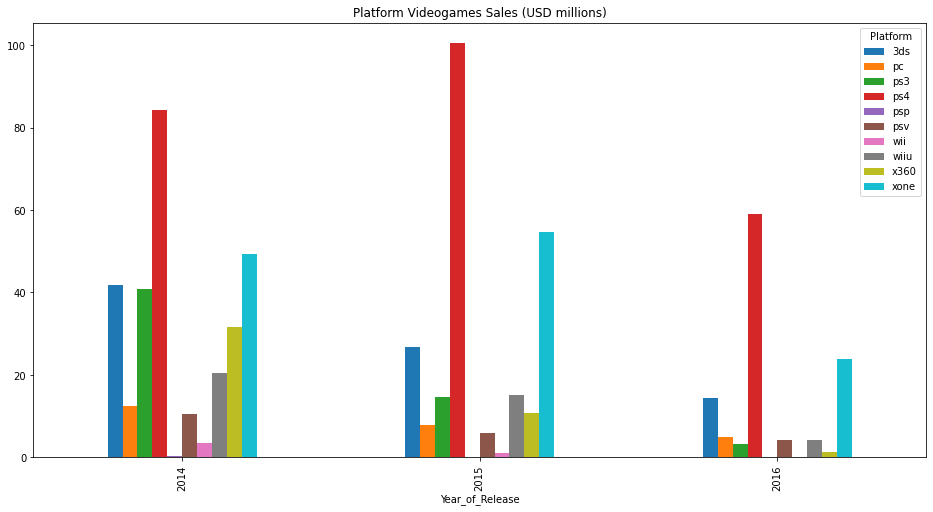

In [39]:
#Making bar chart of Platforms Sales (2014 and later)
games_platform_sales_pivot_now.unstack().plot(kind='bar', figsize = (16,8))
plt.title('Platform Videogames Sales (USD millions)')
plt.show()

The three platforms that are leading in sales the past three years are PS4, XOne and 3DS (in that order).


The following saw a consistent decreasing trend in sales: 3DS, PC, PS3, PSV, Wii, WiiU and X360.

PS3 and X360 used to have high video game sales, but the release of their more modern counterparts canabalized their market share.

Note: PSP sales are very insignificant.

**We've selected PS4, XOne, 3DS and PC as potentially profitable platforms**  
- PS4 and XOne saw an increasing trend from 2014-2015, unlike the rest, and have the most sales.  
- 3DS and PC are the next two with biggest market share in 2016.

In [40]:
games_data_now = games_data_now.query('Platform in ["ps4","xone","3ds","pc"]')
games_data_now['Platform'].value_counts()

ps4     376
xone    228
3ds     212
pc      151
Name: Platform, dtype: int64

<a id='3.5heading'></a>

### Global sales of all games, broken down by platform (2014 - 2016)

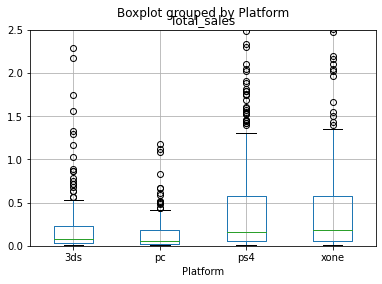

Means


Platform
ps4     0.648059
xone    0.560702
3ds     0.391509
pc      0.166887
Name: Total_sales, dtype: float64

In [41]:
#Creating boxplot for variable Platform based on Total_sales
games_data_now.boxplot(by='Platform', column =['Total_sales'])
plt.ylim(0, 2.5)
plt.show()
#Showing mean total_sales per platform
print('Means')
games_data_now.groupby('Platform')['Total_sales'].mean().sort_values(ascending=False)

The differences in total sales are significant when comparing PS4 and XOne to 3DS and PC.

- The interquartile range and upper outliers bound for PS4 and XOne are very similar, and much larger than those of 3DS and PC, which have similar interquartile ranges.
- The average for PS4 videogame sales is largest at 0.64 million, followed by XOne at 0.56 million. 3DS takes third place with 0.39 million, and PC comes last with a mere 0.17 million.

<a id='3.6heading'></a>

### Do user and professional reviews affect sales for one popular platform? (2014 - 2016)

In [42]:
#Get dataframe with only PS4 games
games_data_now_ps4 = games_data_now.query('Platform == "ps4"')
games_data_now_ps4['Platform'].value_counts()

ps4    376
Name: Platform, dtype: int64

In [43]:
#Dataframe with User_Score and Total_sales (also dropped User_Score nulls)
games_data_now_ps4_ureviews = games_data_now_ps4[['User_Score', 'Total_sales']]
games_data_now_ps4_ureviews = games_data_now_ps4_ureviews.dropna()
games_data_now_ps4_ureviews.head()

,User_Score,Total_sales
42,83.0,10.65
77,43.0,7.30
92,57.0,6.43
94,50.0,6.49
105,65.0,6.04


             User_Score  Total_sales
User_Score     1.000000    -0.039364
Total_sales   -0.039364     1.000000


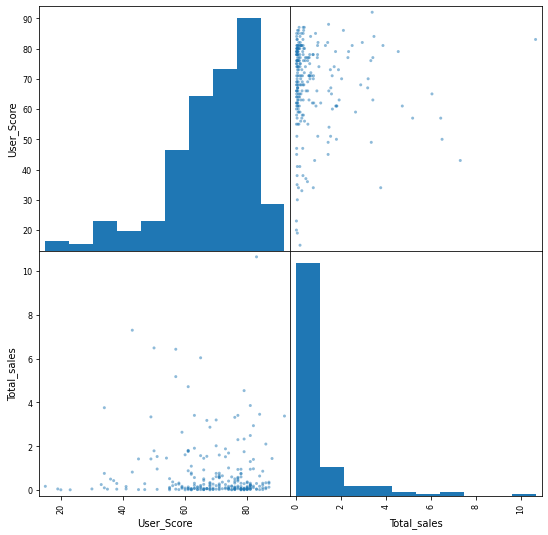

In [44]:
#Making scatterplots and finding correlations
print(games_data_now_ps4_ureviews.corr())
pd.plotting.scatter_matrix(games_data_now_ps4_ureviews, figsize=(9, 9))
plt.show()

In [45]:
#Dataframe with Critic_Score and Total_sales (also dropped Critic_Score nulls)
games_data_now_ps4_previews = games_data_now_ps4[['Critic_Score', 'Total_sales']]
games_data_now_ps4_previews = games_data_now_ps4_previews.dropna()
games_data_now_ps4_previews.head()

,Critic_Score,Total_sales
42,97.0,10.65
77,82.0,7.30
92,83.0,6.43
94,85.0,6.49
105,87.0,6.04


              Critic_Score  Total_sales
Critic_Score       1.00000      0.40212
Total_sales        0.40212      1.00000


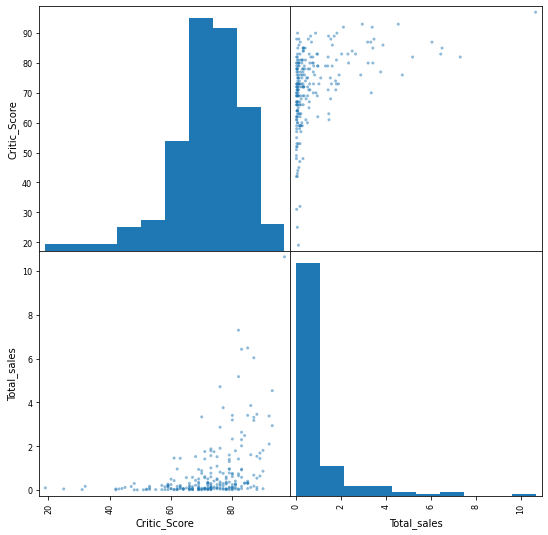

In [46]:
#Making scatterplots and finding correlations
print(games_data_now_ps4_previews.corr())
pd.plotting.scatter_matrix(games_data_now_ps4_previews, figsize=(9, 9))
plt.show()

We can see from the scatterplots that there is an insignificant negative correlation of -0.03 between user_score and total_sales.

However, there is a significant positive correlation of of 0.4 between critic_score and total_sales. This means that critic_score is a potential indicator of whether or not a game has high total_sales.

<a id='3.7heading'></a>

### Comparing the sales of the same game on all platforms (2014 - 2016)

In [47]:
#Get dataframe with only FIFA 15
games_data_now_FIFA15 = games_data_now.query('Name == "fifa 15"')
games_data_now_FIFA15

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_sales
143,fifa 15,ps4,2014,sports,0.80,4.33,0.05,0.90,82.0,57.0,E,5.18
754,fifa 15,xone,2014,sports,0.60,1.42,0.00,0.16,82.0,54.0,E,2.02
4279,fifa 15,3ds,2014,sports,0.09,0.34,0.00,0.03,NaN,24.0,E,0.43
6097,fifa 15,pc,2014,sports,0.00,0.27,0.00,0.02,82.0,42.0,E,0.27


In [48]:
#Set platform as index
games_data_now_FIFA15 = games_data_now_FIFA15.set_index('Platform')

<function matplotlib.pyplot.show(close=None, block=None)>

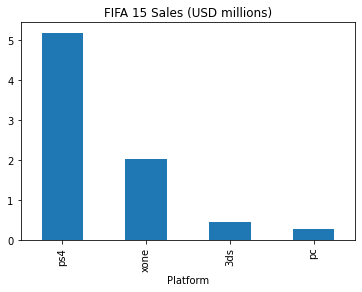

In [49]:
games_data_now_FIFA15['Total_sales'].plot(kind='bar')
plt.title('FIFA 15 Sales (USD millions)')
plt.show

With PS4 being the most popular platform, we can see that it's FIFA 15 sales more than double of second place XOne.

<a id='3.8heading'></a>

### Profitability of games based on genre (2014 - 2016)

In [50]:
#Getting total_sales by genre from 2014-2016
games_data_now_genre = games_data_now.pivot_table(index='Genre', values='Total_sales', aggfunc='sum')
games_data_now_genre

,Total_sales
Genre,
action,132.30
adventure,9.74
fighting,16.21
misc,16.48
platform,8.93
puzzle,0.87
racing,15.60
role-playing,77.21
shooter,121.70


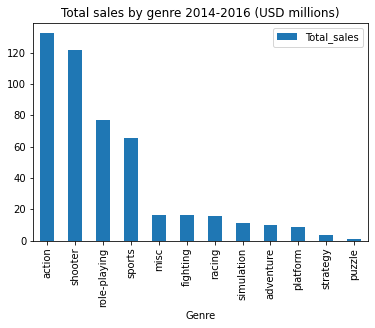

In [51]:
#Bar graph showing total_sales per genre from 2014-2016
games_data_now_genre.sort_values(by='Total_sales', ascending = False).plot(kind='bar')
plt.title('Total sales by genre 2014-2016 (USD millions)')
plt.show()

In [52]:
#Getting table with genre total_sales mean from 2014 - 2016
games_data_now_genre_mean = games_data_now.groupby('Genre')['Total_sales'].mean().sort_values(ascending=False)
games_data_now_genre_mean

Genre
shooter         1.281053
sports          0.714239
role-playing    0.622661
fighting        0.558966
platform        0.405909
action          0.379083
racing          0.318367
simulation      0.310270
misc            0.279322
adventure       0.137183
puzzle          0.108750
strategy        0.108750
Name: Total_sales, dtype: float64

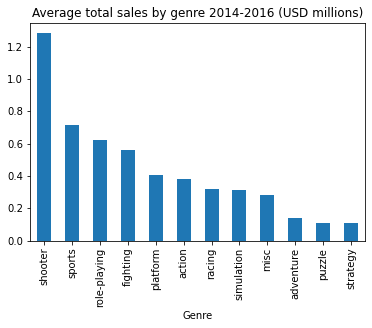

In [53]:
#Making bar graph showing total_sales mean by genre from 2014-2016
games_data_now_genre_mean.plot(kind='bar')
plt.title('Average total sales by genre 2014-2016 (USD millions)')
plt.show()

We can't generalize how profitable a game genre is simply based on total_sales. There are indeed some genres like shooter that have high total_sales and happen to be the most profitable. Howeever, platform games happen to be the third to last in total sales, but the 5th most profitable. Action games happen to have the most total_sales, but are placed sixth in average total sales. 

<a id='4heading'></a>

## Creating a user profile for each region

In this section, we'll see which platforms are popular in the three regions as well as their top five genres. We'll also see if ESRB ratings affect sales in individual regions.

<a id='4.1heading'></a>

### Top Five Platforms by Region

In [54]:
#Creating new dataframe containing data from 2014-2016
games_data_region_now = games_data.query('Year_of_Release >= 2014')
games_data_region_now['Year_of_Release'].value_counts()

2015    606
2014    581
2016    502
Name: Year_of_Release, dtype: int64

In [55]:
#Creating dataframe with NA data
games_data_region_now_NA = games_data_region_now.pivot_table(index=['Platform'], values='NA_sales', aggfunc='sum')
games_data_region_now_NA

,NA_sales
Platform,
3ds,22.64
pc,7.23
ps3,22.05
ps4,98.61
psp,0.00
psv,2.52
wii,2.08
wiiu,19.36
x360,28.30


In [56]:
#Creating dataframe with EU data
games_data_region_now_EU = games_data_region_now.pivot_table(index=['Platform'], values='EU_sales', aggfunc='sum')
games_data_region_now_EU

,EU_sales
Platform,
3ds,16.12
pc,17.97
ps3,25.54
ps4,130.04
psp,0.00
psv,3.53
wii,2.59
wiiu,13.15
x360,15.49


In [57]:
#Creating dataframe with EU data
games_data_region_now_JP = games_data_region_now.pivot_table(index=['Platform'], values='JP_sales', aggfunc='sum')
games_data_region_now_JP

,JP_sales
Platform,
3ds,44.24
pc,0.00
ps3,11.22
ps4,15.02
psp,0.36
psv,14.54
wii,0.00
wiiu,7.31
x360,0.08


In [58]:
#Getting top 5 NA consoles
games_data_region_now_NA = games_data_region_now_NA.query('NA_sales > 22')
print(games_data_region_now_NA)
#Getting top 5 EU consoles
games_data_region_now_EU = games_data_region_now_EU.query('EU_sales > 16')
print(games_data_region_now_EU)
#Getting top 5 JP consoles
games_data_region_now_JP = games_data_region_now_JP.query('JP_sales > 7')
print(games_data_region_now_JP)

          NA_sales
Platform          
3ds          22.64
ps3          22.05
ps4          98.61
x360         28.30
xone         81.27
          EU_sales
Platform          
3ds          16.12
pc           17.97
ps3          25.54
ps4         130.04
xone         46.25
          JP_sales
Platform          
3ds          44.24
ps3          11.22
ps4          15.02
psv          14.54
wiiu          7.31


In [59]:
#Merging tables
data_frames = [games_data_region_now_NA, games_data_region_now_EU, games_data_region_now_JP]
regional_sales = reduce(lambda  left,right: pd.merge(left,right,on=['Platform'],
                                            how='outer'), data_frames)
regional_sales.fillna(0)

,NA_sales,EU_sales,JP_sales
Platform,,,
3ds,22.64,16.12,44.24
ps3,22.05,25.54,11.22
ps4,98.61,130.04,15.02
x360,28.30,0.00,0.00
xone,81.27,46.25,0.00
pc,0.00,17.97,0.00
psv,0.00,0.00,14.54
wiiu,0.00,0.00,7.31


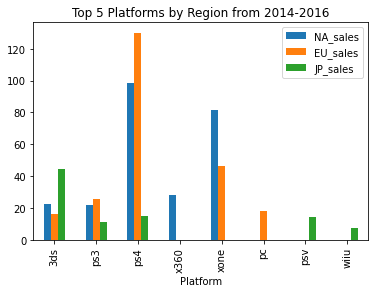

In [60]:
#Bar graphs showing the sales of videogames of 5 top consoles per region
regional_sales.plot(kind='bar')
plt.title("Top 5 Platforms by Region from 2014-2016")
plt.show()

- PS3 and PS4 sales in NA and EU surpass those in JP.
- Japan's most popular console is 3DS; beats NA and EU in sales.
- NA and EU buy mostly PS4 games, followed by XOne.
- Only Japan has PSV and WiiU under their Top 5 consoles, but doesn't have X360 nor XOne
- PC is only popular in Europe

<a id='4.2heading'></a>

### Top Five Genres by Region

In [61]:
#Creating new dataframe containing data from 2014-2016
games_data_genre_now = games_data.query('Year_of_Release >= 2014')
games_data_genre_now['Year_of_Release'].value_counts()

2015    606
2014    581
2016    502
Name: Year_of_Release, dtype: int64

In [62]:
#Creating dataframe with NA data
games_data_genre_now_NA = games_data_region_now.pivot_table(index=['Genre'], values='NA_sales', aggfunc='sum')
games_data_genre_now_NA

,NA_sales
Genre,
action,72.53
adventure,5.64
fighting,12.43
misc,15.05
platform,6.79
puzzle,0.65
racing,8.74
role-playing,33.47
shooter,79.02


In [63]:
#Creating dataframe with EU data
games_data_genre_now_EU = games_data_region_now.pivot_table(index=['Genre'], values='EU_sales', aggfunc='sum')
games_data_genre_now_EU

,EU_sales
Genre,
action,74.68
adventure,6.49
fighting,6.69
misc,12.86
platform,6.80
puzzle,0.52
racing,14.13
role-playing,28.17
shooter,65.52


In [64]:
#Creating dataframe with JP data
games_data_genre_now_JP = games_data_region_now.pivot_table(index=['Genre'], values='JP_sales', aggfunc='sum')
games_data_genre_now_JP

,JP_sales
Genre,
action,29.58
adventure,3.60
fighting,6.37
misc,5.61
platform,2.69
puzzle,0.93
racing,1.76
role-playing,31.16
shooter,4.87


In [65]:
#Getting top 5 NA genres
games_data_genre_now_NA = games_data_genre_now_NA.query('NA_sales > 15')
print(games_data_genre_now_NA)
#Getting top 5 EU consoles
games_data_genre_now_EU = games_data_genre_now_EU.query('EU_sales > 14')
print(games_data_genre_now_EU)
#Getting top 5 JP consoles
games_data_genre_now_JP = games_data_genre_now_JP.query('JP_sales > 4')
print(games_data_genre_now_JP)

              NA_sales
Genre                 
action           72.53
misc             15.05
role-playing     33.47
shooter          79.02
sports           46.13
              EU_sales
Genre                 
action           74.68
racing           14.13
role-playing     28.17
shooter          65.52
sports           45.73
              JP_sales
Genre                 
action           29.58
fighting          6.37
misc              5.61
role-playing     31.16
shooter           4.87


In [66]:
#Merging tables
data_frames = [games_data_genre_now_NA, games_data_genre_now_EU, games_data_genre_now_JP]
genre_sales = reduce(lambda left,right: pd.merge(left,right,on=['Genre'],
                                            how='outer'), data_frames)
genre_sales.fillna(0)

,NA_sales,EU_sales,JP_sales
Genre,,,
action,72.53,74.68,29.58
misc,15.05,0.00,5.61
role-playing,33.47,28.17,31.16
shooter,79.02,65.52,4.87
sports,46.13,45.73,0.00
racing,0.00,14.13,0.00
fighting,0.00,0.00,6.37


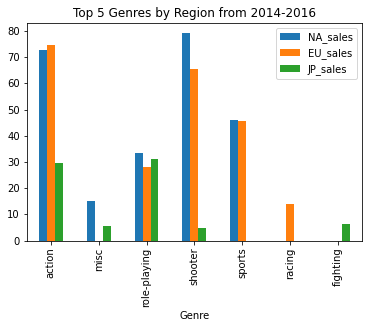

In [67]:
#Bar graphs showing the sales of videogames of 5 top genres per region
genre_sales.plot(kind='bar')
plt.title("Top 5 Genres by Region from 2014-2016")
plt.show()

- From the graph above, we see that action, shooter and sports games are the most popular in NA and EU.
- Role playing and action games are most Japan's most popular genres.

<a id='4.3heading'></a>

### ESRB Ratings and Sales by Region

In [68]:
#Creating new dataframe containing data from 2014-2016
games_data_ESRB_now = games_data.query('Year_of_Release >= 2014')
games_data_ESRB_now['Year_of_Release'].value_counts()

2015    606
2014    581
2016    502
Name: Year_of_Release, dtype: int64

In [69]:
#Creating dataframe with regional sales based on Critic_Score
games_data_ESRB_nows = games_data_ESRB_now.pivot_table(index=['Critic_Score'], values=['NA_sales','EU_sales','JP_sales'], aggfunc='sum')
games_data_ESRB_nows = games_data_ESRB_nows.reset_index()
games_data_ESRB_nows.head()

,Critic_Score,EU_sales,JP_sales,NA_sales
0,19.0,0.06,0.0,0.04
1,20.0,0.05,0.0,0.03
2,25.0,0.05,0.0,0.00
3,26.0,0.01,0.0,0.01
4,31.0,0.02,0.0,0.00


              Critic_Score  EU_sales  JP_sales  NA_sales
Critic_Score      1.000000  0.660253  0.512832  0.662878
EU_sales          0.660253  1.000000  0.577245  0.915280
JP_sales          0.512832  0.577245  1.000000  0.709922
NA_sales          0.662878  0.915280  0.709922  1.000000


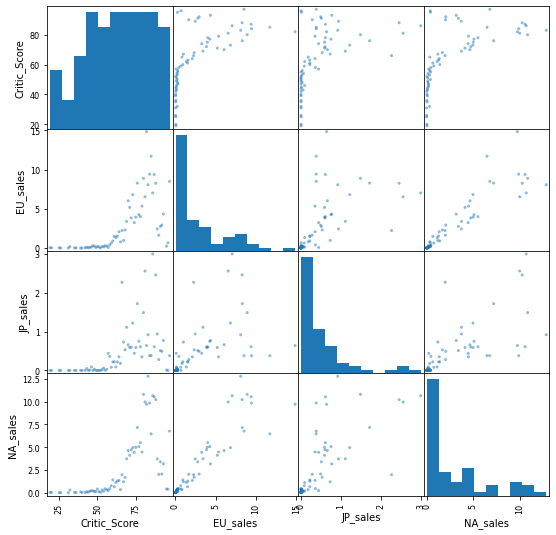

In [70]:
#Making scatterplots and finding correlations
print(games_data_ESRB_nows.corr())
pd.plotting.scatter_matrix(games_data_ESRB_nows, figsize=(9, 9))
plt.show()

- There is a high positive correlation of 0.66 between Critic_Score and NA_sales, meaning that as Critic_Score increases, NA_sales increases.
- There is a high positive correlation of 0.66 between Critic_Score and EU_sales, meaning that as Critic_Score increases, EU_sales increases.
- There is a relatively high positive correlation of 0.51 between Critic_Score and JP_sales, meaning that as Critic_Score increases, JP_sales increases.

<a id='5heading'></a>

## Testing Hypothesis

<a id='5.1heading'></a>

### Average user ratings of the Xbox One and PC platforms are the same

In [71]:
#Query for XOne and PC platforms
games_data_xone = games_data.query('Platform == "xone"')
print(games_data_xone['Platform'].value_counts())
games_data_pc = games_data.query('Platform == "pc"')
print(games_data_pc['Platform'].value_counts())

xone    247
Name: Platform, dtype: int64
pc    957
Name: Platform, dtype: int64


In [72]:
#Drop nulls
games_data_xone = games_data_xone.dropna(subset=['User_Score'])
print(games_data_xone['Platform'].value_counts())
games_data_pc = games_data_pc.dropna(subset=['User_Score'])
print(games_data_pc['Platform'].value_counts())

xone    182
Name: Platform, dtype: int64
pc    755
Name: Platform, dtype: int64


In [73]:
print('XOne user score mean:', games_data_xone['User_Score'].mean())
print('PC user score mean:', games_data_pc['User_Score'].mean())
print('XOne user score variance:', np.var(games_data_xone['User_Score']))
print('PC user score variance:', np.var(games_data_pc['User_Score']))

XOne user score mean: 65.21428571428571
PC user score mean: 70.65960264900663
XOne user score variance: 189.65188383045532
PC user score variance: 234.61128196131727


<ins>Experiment<ins/>

Null Hypothesis H0: Average user ratings of the Xbox One and PC platforms are the same

Alternative Hypothesis H1: Average user ratings of the Xbox One and PC platforms differs

In [74]:
#Experiment
alpha = 0.05 #set a critical statistical significance level

results = st.ttest_ind(games_data_xone['User_Score'], games_data_pc['User_Score'], equal_var = False) # test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue) #print the p-value

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 4.53858029637659e-06
We reject the null hypothesis


We've used the Hypothesis on the Equality of Two Population Means because we need to compare the means of two different statistical populations.

Our analysis suggests that User_Score for XOne and PC does differ because the p-value is such a miniscule amount lower than our 0.05 significance level.

We set the significance level at 0.05 because that level indicates a 5% risk of concluding that a difference exists when there is no actual difference. This level has been traditionally used in statistics. Additionally, we've set equal_var as False because the variances of both columns are not equal to each other.

<a id='5.2heading'></a>

### Average user ratings for the Action and Sports genres are the same

In [75]:
#Query for Action and Sports genres
games_data_action = games_data.query('Genre == "action"')
print(games_data_action['Genre'].value_counts())
games_data_sports = games_data.query('Genre == "sports"')
print(games_data_sports['Genre'].value_counts())

action    3307
Name: Genre, dtype: int64
sports    2305
Name: Genre, dtype: int64


In [76]:
#Drop nulls
games_data_action = games_data_action.dropna(subset=['User_Score'])
print(games_data_action['Genre'].value_counts())
games_data_sports = games_data_sports.dropna(subset=['User_Score'])
print(games_data_sports['Genre'].value_counts())

action    1796
Name: Genre, dtype: int64
sports    1080
Name: Genre, dtype: int64


In [77]:
print('Action user score mean:', games_data_action['User_Score'].mean())
print('Sports user score mean:', games_data_sports['User_Score'].mean())
print('Action user score variance:', np.var(games_data_action['User_Score']))
print('Sports user score variance:', np.var(games_data_sports['User_Score']))

Action user score mean: 70.58129175946547
Sports user score mean: 69.52777777777777
Action user score variance: 202.63648741821675
Sports user score variance: 262.1103395061723


In [78]:
#Experiment
alpha = 0.05 #set a critical statistical significance level

results = st.ttest_ind(games_data_action['User_Score'], games_data_sports['User_Score'], equal_var = False) # test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue) #print the p-value

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.07751671595536654
We can't reject the null hypothesis


We've used the Hypothesis on the Equality of Two Population Means because we need to compare the means of two different statistical populations.

Our analysis suggests that user score for Action games is the same as Sports games because the p-value is larger than our 0.05 significance level.

We set the significance level at 0.05 because that level indicates a 5% risk of concluding that a difference exists when there is no actual difference. This level has been traditionally used in statistics. Additionally, we've set equal_var as False because the variances of both columns are not equal to each other.

<a id='6heading'></a>

## General Conclusion

With the help of bar graphs, we saw that total games released has remained consitent since 2014 and there is no reason to believe that 2017 will be any different. 2014 marks the inception of next generation consoles PS4 and XOne.

It takes about 5-6 years for new platforms to appear and old ones to fade. PS4 and XOne saw an increasing trend in games sales from 2014-2015, unlike the rest, and have the most sales in 2014, 2015 and 2016. The data indicates that the PS4 and XOne consoles that will have the most sales for 2017 because their product lifetime has only started in 2014.

After taking these points into consideration, we worked data from 2014 and later. We selected PS4, XOne, 3DS and PC as potentially profitable platforms since they had the biggest market shares. The differences in total sales are significant when comparing PS4 and XOne to 3DS and PC. PS4 and XOne has larger total sales than 3DS and PC as depicted in their interquartile ranges and averages.

Moreover, there is a significant positive correlation of of 0.4 between critic_score and total_sales. This means that critic_score is a potential indicator of whether or not a game has high total_sales.

We can't generalize how profitable a game genre is simply based on total_sales. Action games happen to have the most total_sales, but are placed sixth in average total sales. 

----------------------o

The typical NA and EU customer buy mostlys PS4 games, followed by XOne. JP's most popular console is 3DS; beats NA and EU in sales. PC is only popular in EU.

The typical NA and EU customer buys action, shooter and sports games. Role playing and action games are most Japan's most popular genres.

In the three regional markets, there is a high positive correlation between Critic_Score and sales, meaning that as Critic_Score increases, sales increases.

----------------------o

Our experminets suggests that User_Score for XOne and PC does differ and that User_Score for Action games is the same as Sports games.